In [1]:
#importing required libraries
import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#reading the data
ba=pd.read_csv('/content/new_train.csv')

In [3]:
#to see the what is data
ba.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [4]:
#to know the no.of rows & cols
ba.shape

(32950, 16)

In [5]:
ba.y.value_counts()

no     29238
yes     3712
Name: y, dtype: int64

In [6]:
#to see the statistical analysis of data
ba.describe()

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


In [7]:
#to know the types of variables and null values are present or not
ba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [8]:
#to know the feature varibles
ba.dtypes

age             int64
job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
dtype: object

In [9]:
#to know how many null values present in each col
ba.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [10]:
#to see the columns in data set
ba.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [11]:
#correlation between features 
ba.corr()

,age,duration,campaign,pdays,previous
age,1.000000,-0.001841,0.003302,-0.032011,0.020670
duration,-0.001841,1.000000,-0.075663,-0.047127,0.022538
campaign,0.003302,-0.075663,1.000000,0.053795,-0.079051
pdays,-0.032011,-0.047127,0.053795,1.000000,-0.589601
previous,0.020670,0.022538,-0.079051,-0.589601,1.000000


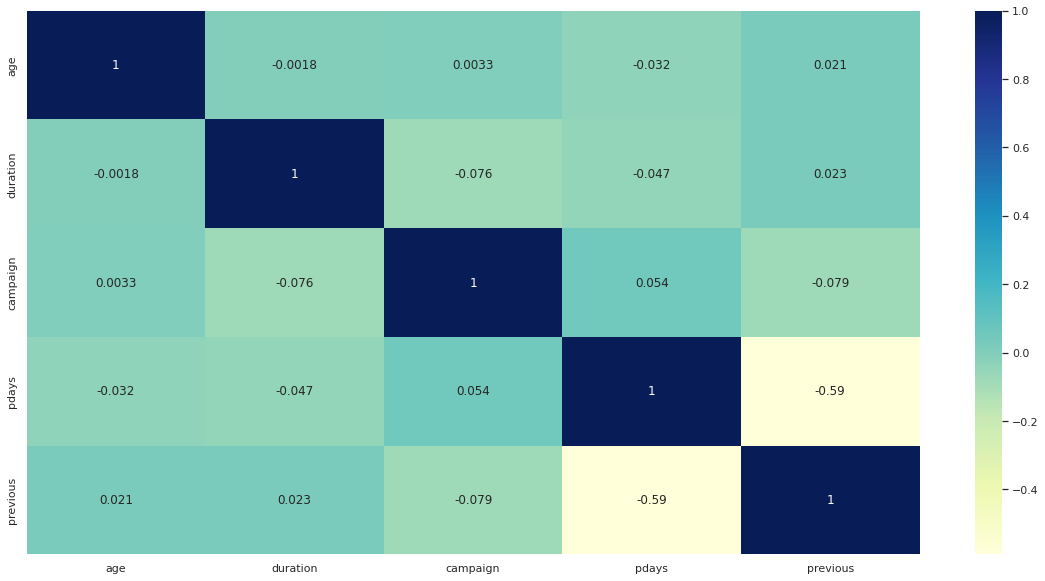

In [12]:
# features correlation with  visualization using seaborn
sns.set(rc={'figure.figsize': (20, 10)})
sns .heatmap(ba.corr(),annot=True,annot_kws={'size':12},cmap="YlGnBu")
plt.show()

In [13]:
#to get only numerical cols 
num=ba._get_numeric_data() 
num.head()

,age,duration,campaign,pdays,previous
0,49,227,4,999,0
1,37,202,2,999,1
2,78,1148,1,999,0
3,36,120,2,999,0
4,59,368,2,999,0


In [14]:
#to get only cat cols and changing it as categorical from object 
cat=ba.drop(num,axis=1)
cat=cat.astype('category')
cat.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,nonexistent,no
1,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,failure,no
2,retired,married,basic.4y,no,no,no,cellular,jul,mon,nonexistent,yes
3,admin.,married,university.degree,no,yes,no,telephone,may,mon,nonexistent,no
4,retired,divorced,university.degree,no,no,no,cellular,jun,tue,nonexistent,no


In [15]:
#droping the target variable
cat1=cat.drop(['y'],axis=1)
cat1.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,nonexistent
1,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,failure
2,retired,married,basic.4y,no,no,no,cellular,jul,mon,nonexistent
3,admin.,married,university.degree,no,yes,no,telephone,may,mon,nonexistent
4,retired,divorced,university.degree,no,no,no,cellular,jun,tue,nonexistent


In [16]:
#assign the target variable to t
t=cat.drop(cat1,axis=1)
t

,y
0,no
1,no
2,yes
3,no
4,no
...,...
32945,no
32946,no
32947,no
32948,no


In [17]:
#converting the target variable as num by using Labelencoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
t1 = le.fit_transform(t)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
#converting encoded value to DataFrame
t1=pd.DataFrame(t1,columns=t.columns)
t1.shape

(32950, 1)

In [19]:
#converting the object to cat cols
cat_col = pd.Categorical(cat1)
cat1.dtypes

job            category
marital        category
education      category
default        category
housing        category
loan           category
contact        category
month          category
day_of_week    category
poutcome       category
dtype: object

In [20]:
#converting the cat cols to num cols by dummify
df_dummies = pd.get_dummies(cat1)

In [21]:
df_dummies

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
32946,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
32947,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
32948,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [22]:
#merging the num cols and dummified data as single data
final_data=num.join(df_dummies)
final_data.head()

,age,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,49,227,4,999,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,37,202,2,999,1,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
2,78,1148,1,999,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,36,120,2,999,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,59,368,2,999,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [23]:
#checking the shape of merged data
final_data.shape

(32950, 58)

In [24]:
final_data1=final_data.drop(['previous','pdays'],axis=1)


In [25]:
#checking the null values in merged data
final_data1.isnull().sum()

age                              0
duration                         0
campaign                         0
job_admin.                       0
job_blue-collar                  0
job_entrepreneur                 0
job_housemaid                    0
job_management                   0
job_retired                      0
job_self-employed                0
job_services                     0
job_student                      0
job_technician                   0
job_unemployed                   0
job_unknown                      0
marital_divorced                 0
marital_married                  0
marital_single                   0
marital_unknown                  0
education_basic.4y               0
education_basic.6y               0
education_basic.9y               0
education_high.school            0
education_illiterate             0
education_professional.course    0
education_university.degree      0
education_unknown                0
default_no                       0
default_unknown     

In [26]:
#concating the target variable to data
final_data12=final_data1.join(t1)

In [27]:
#checking the shape of the data
final_data12.shape

(32950, 57)

In [28]:
final_data12.head()

,age,duration,campaign,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y
0,49,227,4,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,37,202,2,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,78,1148,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,1
3,36,120,2,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,59,368,2,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0


In [29]:
final_data12.y.value_counts()

0    29238
1     3712
Name: y, dtype: int64

In [30]:
#concating the target variable to data
X=final_data12.drop(['y'],axis=1)
Y=final_data12.drop(X,axis=1)

In [31]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

#Separate majority and minority classes
z = final_data12[final_data12['y']==0]
o = final_data12[final_data12['y']==1]



In [32]:
print(z.shape,o.shape)

(29238, 57) (3712, 57)


In [33]:
smk=SMOTETomek(random_state=42)


In [34]:
x_res,y_res=smk.fit_resample(X,Y)

In [35]:
print(x_res.shape,y_res.shape)

(58168, 56) (58168, 1)


In [36]:
#importing the spliting slibraries to split the data
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x_res,y_res,random_state=104,test_size=0.25,shuffle=True)

In [37]:
#importing the requried model to fitand predict the data
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [38]:
#pridict the data of train after fitting
y_pred = clf.predict(x_train)

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
accuracy_tr = accuracy_score(y_train, y_pred)
precision_tr = precision_score(y_train, y_pred, average='weighted')
recall_tr = recall_score(y_train, y_pred, average='weighted')
f1_tr = f1_score(y_train, y_pred, average='weighted')

In [40]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [41]:

#checking the accuracy of the model for train data
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [42]:
#pridict the data of test, after fitting
Y_pred=clf.predict(x_test)

In [43]:
#checking the accuracy of the model for test data
acc=accuracy_score(y_test,Y_pred)
print("Accuracy",acc)

Accuracy 0.9337780222802916


In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
accuracy = accuracy_score(y_test, Y_pred)
precision = precision_score(y_test, Y_pred, average='weighted')
recall = recall_score(y_test, Y_pred, average='weighted')
f1 = f1_score(y_test, Y_pred, average='weighted')

In [45]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1 Score: 0.93


In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 4, 6, 8]
}    

In [48]:
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1)

In [49]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [1, 2, 4, 6, 8],
                         'min_samples_split': [2, 4, 6, 8, 10]})

In [50]:
g_pred=grid_search.predict(x_train)

In [62]:
#checking the performance metrics of the model for test data
accuracy = accuracy_score(y_train, g_pred)
precision = precision_score(y_train, g_pred, average='weighted')
recall = recall_score(y_train, g_pred, average='weighted')
f1 = f1_score(y_train, g_pred, average='weighted')

In [66]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1 Score: 0.93


In [51]:
#checking the accuracy of the model for test data
acc=accuracy_score(y_train,g_pred)
print("Accuracy",acc)

Accuracy 0.9425342685554486


In [52]:
print('Best parameters: ', grid_search.best_params_)
print('Best score: ', grid_search.best_score_)

Best parameters:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 6}
Best score:  0.9300646738298809


In [53]:
g_pred1=grid_search.predict(x_test)

In [60]:
g_pred1

array([0, 0, 0, ..., 1, 0, 0])

In [55]:
#checking the accuracy of the model for test data
acc=accuracy_score(y_test,g_pred1)
print("Accuracy",acc)

Accuracy 0.9321276303121991


In [63]:
#checking the performance metrics of the model for test data
accuracy = accuracy_score(y_test, g_pred1)
precision = precision_score(y_test, g_pred1, average='weighted')
recall = recall_score(y_test, g_pred1, average='weighted')
f1 = f1_score(y_test, g_pred1, average='weighted')

In [65]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1 Score: 0.93
